In [1]:
import numpy as np


In [2]:
class AgglomerativeClustering:
    def __init__(self, n_clusters=2, linkage='ward'):
        assert linkage in ['single', 'average', 'ward'], "Supported: 'single', 'average', 'ward'"
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.labels_ = None

    def fit(self, X):
        self.X = X
        clusters = [[i] for i in range(len(X))]

        while len(clusters) > self.n_clusters:
            min_dist = float('inf')
            to_merge = (0, 1)

            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    dist = self._compute_distance(clusters[i], clusters[j])
                    if dist < min_dist:
                        min_dist = dist
                        to_merge = (i, j)

            i, j = to_merge
            new_cluster = clusters[i] + clusters[j]
            clusters.pop(j)
            clusters.pop(i)
            clusters.append(new_cluster)

        self.labels_ = np.empty(len(X), dtype=int)
        for label, cluster in enumerate(clusters):
            for idx in cluster:
                self.labels_[idx] = label

    def _compute_distance(self, cluster1, cluster2):
        X = self.X
        if self.linkage == 'single':
            return min(np.linalg.norm(X[i] - X[j]) for i in cluster1 for j in cluster2)
        elif self.linkage == 'average':
            dists = [np.linalg.norm(X[i] - X[j]) for i in cluster1 for j in cluster2]
            return np.mean(dists)
        elif self.linkage == 'ward':
            points = np.vstack([X[i] for i in cluster1 + cluster2])
            centroid = np.mean(points, axis=0)
            return np.sum((points - centroid) ** 2)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

X, _ = make_blobs(n_samples=100, centers=3, random_state=42, cluster_std=2)


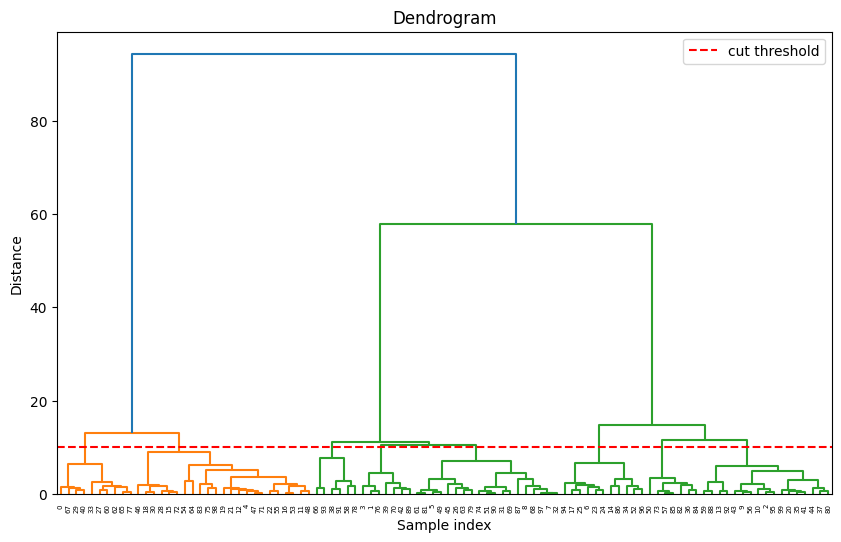

In [8]:
Z = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.axhline(y=10, color='r', linestyle='--', label='cut threshold')
plt.legend()
plt.show()

In [9]:
n_clusters = 3
model = AgglomerativeClustering(n_clusters, linkage='ward')  # Change to 'single' or 'average'
model.fit(X)
labels = model.labels_

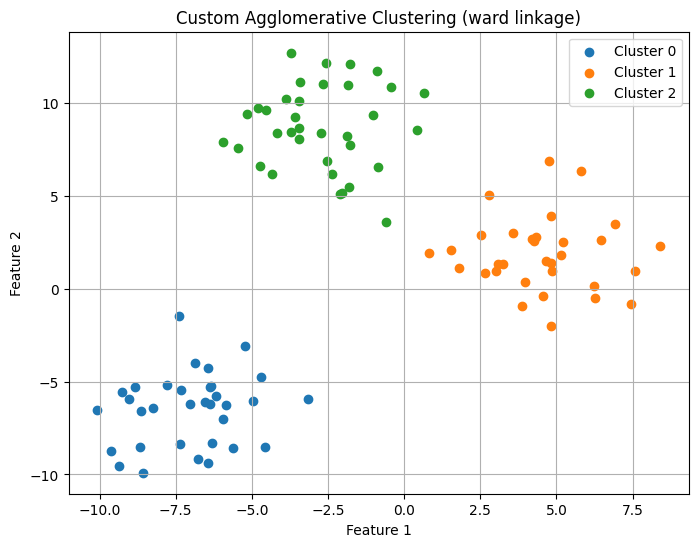

In [10]:
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(labels):
    cluster_points = X[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}")

plt.title(f"Custom Agglomerative Clustering ({model.linkage} linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()